
    Princess Ibtihaj

    Fall 2024

    CS 251: Data Analysis and Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 14})

np.set_printoptions(suppress=True, precision=5)

"# Automatically reload external modules" 
%load_ext autoreload
%autoreload 2

# Project 2 | Categorical and Exploratory Data Analysis"

## Task 0: Get set up

### 0a. Download and copy files
1. Copy over your `data.py` and `analysis.py` files from Project 1 into your Project 2 working directory.
2. Download the Project 2 code templates (`categorical_data.py` and `categorical_analysis.py`) into your Project 2 working directory.
3. Create a subfolder called `data` and download the Austin Pet Dataset (`austin_pet.csv`) and `test_data_mixed.csv` to your working directory.
4. Copy `charts.py` from Lab 2 into your Project 2 folder.

**NOTE:** If you did not add support for missing data in your `Data` class, download `austin_pet_no_missing.csv` instead of `austin_pet.csv`.

### 0b. Questions

**Question 1:** Open `austin_pet.csv` in a text editor and examine the Austin Pet dataset. Name and briefly explain two reasons why data may be missing.

**Answer 1:**

There could be so many possible reasons for why some of data are missing. There might be instances where the individuals who input the data into the system might have accidentally skipped some fields or entered the wrong information. This is quite common in large datasets, especially if the data entry process is manual. For example, the `in_reason` and `in_condition` fields are empty for all records in the provided file, suggesting that these might have been excluded out during data entry.

Also, in some cases, specific information about an animal might not have been available at the time of data entry. For example, details about the found location, found state, and reasons for intake (`found_location`, `found_state`, `in_reason`) might not always be known, especially if an animal was abandoned or if the animal was brought in under emergency circumstances where detailed information could not be collected.

Also, some fields might not be applicable to all animals. For example, not all animals might have names assigned at the time of intake, leading to missing data in the `name` field. Similarly, the date of birth (`dob_year`, `dob_month`, `dob_day`) might be unknown for strays or abandoned animals.


**Answer 1:**

## Task 1: Techniques for exploratory data analysis that leverage categorical data

The Austin Pet Dataset contains mostly **categorical data variables**. In this task, your goal is to implement and test some helpful methods for working with categorical variables and their levels. We will focus on 2 techniques for performing exploratory data analysis that involve categorical data:
1. computing the number of samples that have different levels of specific categorical variables of interest.
2. filtering a dataset based on the level of a categorical variable.
Before applying your tools to analyze the Austin Pet Dataset, as is usally a good idea, you will test your code on smaller and simpler test datasets (`test_data_mixed.csv` and `iris.csv`) to help verify that everything works.

### 1a. Helper methods to convert between string and numeric categorical variable level representations

    Recall that the `self.data` 2D ndarray in your `Data` class contains numeric representations of categorical variables. For example, you may store the float `0.0` for the `Dog` level of the variable `animal_type`, `1.0` for the `Cat` level, etc. The mapping between the numeric and string representations is stored separately from the `self.data` ndarray (i.e. as the `self.cats2levels` dictionary).
    
    Implement the following helper methods of the `CatData` class in `categorical_data.py` that convert between the numeric and string representation of each categorical variable level.
        - `get_cat_levels_str(self, header)'
        - `get_cat_levels_int(self, header)`
        - `int2strlevels(self, header, int_levels)`
        - `str2intlevels(self, header, str_levels)`

    Use the code below to test your code.

In [2]:
from categorical_data import CatData

In [6]:
d_test = CatData(filepath='data/test_data_mixed.csv')

##### Test `get_cat_levels_str`

In [8]:
print('Your string coded levels for the categorical variable spirit_animal:')
test_level_strings = d_test.get_cat_levels_str('spirit_animal')
print(test_level_strings)
print("and it should look like:\n['Penguin' 'Koala' 'Frog']")
if type(test_level_strings) is not np.ndarray:
    print('\\nYour get_cat_levels_str is not returning an ndarray but it should be.\\nDid you remember to cast your list of strings with np.array?')

Your string coded levels for the categorical variable spirit_animal:
['Penguin' 'Koala' 'Frog']
and it should look like:
['Penguin' 'Koala' 'Frog']


##### Test `get_cat_levels_int`

In [9]:
print('Your int coded levels for the categorical variable spirit_animal:')
test_level_ints = d_test.get_cat_levels_int('spirit_animal')
print(test_level_ints)
print("and it should look like:\n[0 1 2]")

if not isinstance(test_level_ints, np.ndarray):
    print('\\nYour get_cat_levels_int is not returning an ndarray but it should be.\\nDid you remember to cast your list of ints with np.array?')
if test_level_ints.dtype != np.int64:
    print('Your ndarray dtype is not int, but it should be.')

Your int coded levels for the categorical variable spirit_animal:
[0 1 2]
and it should look like:
[0 1 2]


##### Test `int2strlevels`

In [10]:
print('Converting your int coded levels into string coded levels for spirit_animal, we get:')
print(d_test.int2strlevels('spirit_animal', d_test.get_cat_levels_int('spirit_animal')))
print("and it should look like:\n['Penguin', 'Koala', 'Frog']")

Converting your int coded levels into string coded levels for spirit_animal, we get:
['Penguin', 'Koala', 'Frog']
and it should look like:
['Penguin', 'Koala', 'Frog']


    ##### Test `str2intlevels`


In [11]:
print('Converting your string coded levels into int coded levels for spirit_animal, we get:')
print(d_test.str2intlevels('spirit_animal', ['Penguin', 'Koala', 'Frog']))
print("and it should look like:\n[0, 1, 2]")

Converting your string coded levels into int coded levels for spirit_animal, we get:
[0, 1, 2]
and it should look like:
[0, 1, 2]


### 1b. Categorical data analysis technique (1/2): Counting the number of data samples that have the same categorical variable level\n",
    "The Austin Pet dataset has almost 200,000 samples (!) and is mostly comprised of categorical variables. A helpful way to explore such a large dataset is to compute and visualize the number of samples that have different levels of specific categorical variables of interest. For example, we can use this analysis to answer the question: *How many animals arrived to the shelter each year since 2013?*
    
    In `categorical_analysis.py` implement the `cat_count(self, header)` method in the `CatAnalysis` class.
    
    Run the below code to test your implementation.
    
    <!-- For the the `test_data_mixed.csv` dataset, use your `cat_count` implementation to compute number of samples that have each level of the variables
    - `fav_color`
    - `spirit_animal` -->
    
    You should get the following results:
    
    
    fav_color:
    The levels are ['Purple' 'Yellow' 'Black']
    and the counts for each level are
    [4 4 1]
    spirit_animal:
    The levels are ['Penguin' 'Koala' 'Frog']
    and the counts for each level are
    [3 3 3]
    ```

In [12]:
from categorical_analysis import CatAnalysis


In [13]:
d_mix = CatData(filepath='data/test_data_mixed.csv')
a_mix = CatAnalysis(d_mix)

print('fav_color:')
counts, levels = a_mix.cat_count('fav_color')
print(f"The levels are {levels}\nand the counts for each level are\n{counts}")
    
print('spirit_animal:')
counts, levels = a_mix.cat_count('spirit_animal')
print(f"The levels are {levels}\nand the counts for each level are\n{counts}")

fav_color:
The levels are ['Purple' 'Yellow' 'Black']
and the counts for each level are
[4, 4, 1]
spirit_animal:
The levels are ['Penguin' 'Koala' 'Frog']
and the counts for each level are
[3, 3, 3]


### 1c. Create a horizontal bar chart to plot categorical counts
    
    Run the below test code to create a horizontal bar plot of the counts you obtained for the `fav_color` categorical variable. If everything is working as expected, you should get a plot that looks like this:


![example_barchart.png](attachment:8973b1cd-bb37-4da0-9b14-c302b3651f73.png)

In [14]:
import charts

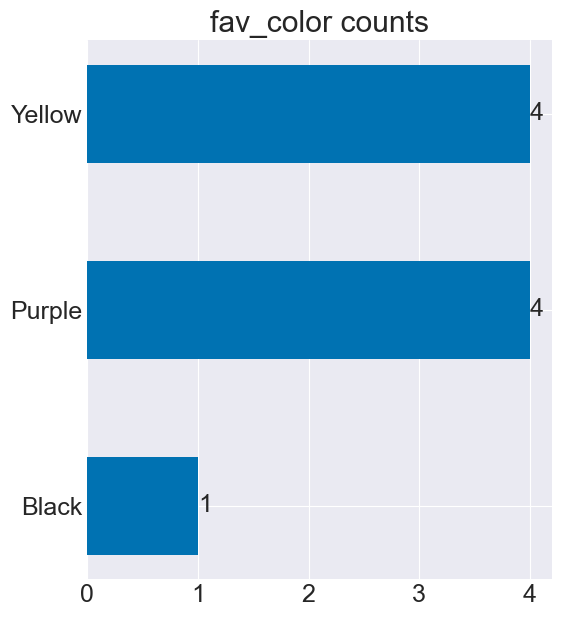

In [15]:
a_mix = CatAnalysis(d_test)
counts, levels = a_mix.cat_count('fav_color')
charts.sidebarplot(values=counts, labels=levels, title='fav_color counts')

### 1d. Test `sort` function in `charts.py`\n",

    Run the below test code to make sure that the `sort` function that you wrote in Lab 2 in `charts.py` works in the following cases.

In [16]:
test_labels = np.array(['c', 'a', 'd', 'b'], dtype=str)
test_values = np.array([20, 40, 10, 30], dtype=int)
    
# Test sorting by value
test_values_sort, test_labels_sort = charts.sort(test_values, test_labels, sort_by='value')
print(f"After sorting by value, the labels are:\n{test_labels_sort}\nand should be\n['d' 'c' 'b' 'a']\nThe values are:\n{test_values_sort}\nand should be\n[10 20 30 40]")

After sorting by value, the labels are:
['d' 'c' 'b' 'a']
and should be
['d' 'c' 'b' 'a']
The values are:
[10 20 30 40]
and should be
[10 20 30 40]


In [18]:
# Test sorting by label
test_values_sort, test_labels_sort = charts.sort(test_values, test_labels, sort_by='label')
print(f"After sorting by value, the labels are:\n{test_labels_sort}\nand should be\n['a' 'b' 'c' 'd']\nThe values are:\n{test_values_sort}\nand should be\n[40 30 20 10]")

After sorting by value, the labels are:
['a' 'b' 'c' 'd']
and should be
['a' 'b' 'c' 'd']
The values are:
[40 30 20 10]
and should be
[40 30 20 10]


In [19]:
# Test no sorting
test_values_sort, test_labels_sort = charts.sort(test_values, test_labels, sort_by='na')
print(f"After sorting by value, the labels are:\n{test_labels_sort}\nand should be\n['c' 'a' 'd' 'b']\nThe values are:\n{test_values_sort}\nand should be\n[20 40 10 30]")

After sorting by value, the labels are:
['a' 'b' 'c' 'd']
and should be
['c' 'a' 'd' 'b']
The values are:
[40 30 20 10]
and should be
[20 40 10 30]


### 1e. Categorical data analysis technique (2/2): Filter a dataset by a categorical level

    This technique allows us to focus the analysis on samples that have a specific categorical level of interest. For example, how many animals arrive to the shelter who are in Sick condition?
    
    In order to perform this type of analysis, implement the following methods in your `CatData` class:
    - `reset_dataset`
    - `filter(self, header, strlevel)
   
    The below test code filters the dataset based on the `'Purple'` level of the categorical variable `'fav_color'`, prints out the dataset, then repeats the process, but this time filtering by `'Koala'` level of the categorical variable `'spirit_animal'`.
   
    You should get something that looks like the following (*the entries are important, not the formatting*):
   
   
    Filtering by Purple level of fav_color:
    -------------------------------
    data/test_data_mixed.csv (4x7)
    Headers:
    age\tfav_color\tshoe_size\theight\tfav_pastime\tspirit_animal\tfav_food,
    -------------------------------,
    30.0\t0.0\t7.5\t160.0\t0.0\t0.0\t0.0\
    25.0\t0.0\t10.5\t180.0\t0.0\t0.0\t1.0\
    35.0\t0.0\t8.0\t170.0\t1.0\t2.0\t2.0\
    31.0\t0.0\t11.0\t185.0\t2.0\t0.0\t1.0\
    
    -------------------------------,
    Filtering by Koala level of spirit_animal:
    -------------------------------,
    data/test_data_mixed.csv (3x7)
    Headers:
    age\tfav_color\tshoe_size\theight\tfav_pastime\tspirit_animal\tfav_food,
    -------------------------------
    22.0\t1.0\t9.0\t175.0\t0.0\t1.0\t1.0
    28.0\t1.0\t6.5\t155.0\t1.0\t1.0\t1.0
    27.0\t1.0\t6.0\t158.0\t2.0\t1.0\t2.0
   
    -------------------------------
   
   
**Note:** You should reset the dataset each time before you filter. This is prevent the filters from compounding, which can be useful but is not desired here. For the remainder of your project, it would be a good idea to reset the dataset before running any analyses to prevent any filters that were applied previously from unintentionally influencing your results.

In [20]:
d_test = CatData(filepath='data/test_data_mixed.csv')
d_test.reset_dataset()
d_test.filter('fav_color', 'Purple')
print('Filtering by Purple level of fav_color:')
print(d_test)
d_test.reset_dataset()
d_test.filter('spirit_animal', 'Koala')
print('Filtering by Koala level of spirit_animal:')
print(d_test)

Filtering by Purple level of fav_color:
----------
data/test_data_mixed.csv (4x7)
Headers:
age fav_color shoe_size height fav_pastime spirit_animal fav_food










4/4 rows
30.0 0.0 7.5 160.0 0.0 0.0 0.0
25.0 0.0 10.5 180.0 0.0 0.0 1.0
35.0 0.0 8.0 170.0 1.0 2.0 2.0
31.0 0.0 11.0 185.0 2.0 0.0 1.0
----------
Filtering by Koala level of spirit_animal:
----------
data/test_data_mixed.csv (3x7)
Headers:
age fav_color shoe_size height fav_pastime spirit_animal fav_food










3/3 rows
22.0 1.0 9.0 175.0 0.0 1.0 1.0
28.0 1.0 6.5 155.0 1.0 1.0 1.0
27.0 1.0 6.0 158.0 2.0 1.0 2.0
----------


## Task 2: Exploratory data analysis of the Austin Pet dataset focusing on when do animals arrive at the shelter and in what condition

Apply the toolbox of categorical data analysis techniques that you implemented to gain insight about Austin Pet dataset. Each of the following subtasks focus on a specific exploratory question related to when do animals arrive at the shelter and in what condition.

For each of the following subtasks:
1. Decide on the relevant variable(s) in the Austin Pet dataset to explore. Consult the below description for the meaning of each variable in the dataset.
2. Decide on whether filtering should be used before computing categorical level counts to address the question.
3. Create **ONE** "high quality" horizontal bar chart showing the result of your analysis (titled, labeled, etc.).
4. In several sentences, interpret the results of your analysis in the context of the question. What insight did we gain?

<!-- 2. Decide on which of the 3 analysis techniques are appropriate to address the question. In most cases, **ONE** technique should be selected, but if filtering is needed, it should be combined with one of the other two techniques. -->

### The Austin Pet Dataset

In this project, you will perform **exploratory data analysis** on a large, complex, real-world dataset — the Austin Pet Dataset. The city of Austin, TX operates the largest "No Kill" animal shelter in the US and makes detailed data on each animal that enters and/or leaves publicly available. Data-driven insights that members of the community (*yourself included!*) could be used to help the animals. For example, the shelter could help improve animal care, increase adoption rates, etc. The data record goes from October 1, 2013 to present (2023). 

Here is the official website: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238

Here is the list of the variables (*headers*) in the dataset, along with brief descriptions:
- **animal_id**: Unique numeric (int) ID assigned to each animal that enters the shelter (e.g. `664450`).
- **name**: The name of the animal (e.g. `Miss Kitty`), if known.
- **in_reason**: The reason why the animal entered the shelter (e.g. `Stray`).
- **in_condition**: The condition of the animal at the time of arrival at the shelter (e.g. `Normal`, `Sick`).
- **animal_type**: The type of animal (e.g. `Dog`, `Cat`).
- **breed**: The breed of the animal (e.g. `Labrador Retriever Mix`).
- **color**: The color of the animal (e.g. `Black/White`).
- **in_year**: The year in which the animal entered the shelter (e.g. `2023`).
- **in_month**: The month that the animal entered the shelter, represented as an 2 digit int (e.g. `03` for March, `11` for November).
- **in_day**: The day on which the animal entered the shelter, represented as an 2 digit int (e.g. `01` for the first day of the month, `30` for the 30th).
- **in_hour**: The hour of the day on which the animal entered the shelter, represented as an 2 digit int (e.g. `09` 9AM in the morning, `21` for 9PM in the evening). Because the hours are represented in 24 hour format ("military time"), values range from `01` to `24`.
- **found_state**: The state in which the animal was found before coming to the shelter (`TX` or `Outside TX`).
- **found_location**: The street (or region) on which the animal was found before coming to the shelter (`421 Thompson #2 in Austin`), if known.
- **sex**: Could be `Male`, `Female`, `Unknown`.
- **in_age_years**: Age of the animal upon arrival at the shelter in years. Could be a float (e.g. `0.5` for half a year old).
- **outcome**: The reason why the animal left the shelter (e.g. `Adoption`, `Transfer`). If the value is missing, the animal could still be in the shelter.
- **outcome_subtype**: More detailed reason why the animal left the shelter (e.g. `Rabies Risk`).
- **out_year**: The year in which the animal left the shelter (e.g. `2023`). If the value is missing, the animal could still be in the shelter.
- **out_month**: The month that the animal left the shelter, represented as an 2 digit int (e.g. `03` for March, `11` for November).
- **out_day**: The day on which the animal left the shelter, represented as an 2 digit int (e.g. `01` for the first day of the month, `30` for the 30th).
- **out_hour**: The hour of the day on which the animal left the shelter, represented as an 2 digit int (e.g. `09` 9AM in the morning, `21` for 9PM in the evening).
- **out_age_years**: Age of the animal upon leaving the shelter in years. Could be a float (e.g. `0.5` for half a year old).
- **dob_year**: The year in which the animal was born (e.g. `2006`).
- **dob_month**: The year on which the animal was born, represented as an 2 digit int (e.g. `03` for March, `11` for November).
- **dob_day**: The day on which the animal left the shelter, represented as an 2 digit int (e.g. `01` for the first day of the month, `30` for the 30th).

**Data types:** All variables EXCEPT for the following are categorical: `animal_id` (numeric), `name` (string), `found_location` (string), and `in_age_years` (numeric).

**Note about missing values:** As is often the case with real-world datasets, quite a few entries in the `austin_pet.csv` file are missing. This is why you implemented support for numeric (`np.nan`) and categorical (`'Missing'` level) missing data in your `Data` class!

### 2a. How many animals have arrived to the shelter each year since 2013?

**Reminders:**
- Create `CatData` and `CatAnalysis` objects to work with the Austin Pet dataset (instead of `Data` and `Analysis`). *You only should create the `CatData` and `CatAnalysis` objects once for the rest of the project. It takes a few seconds to read in the Austin Pet dataset, so you do not want to do this every time you generate a plot!*
- Start by resetting the dataset even if you are not filtering the dataset to avoid accidental effects.

In [21]:
import matplotlib.pyplot as plt

data = CatData(filepath="data/austin_pet.csv")
analysis = CatAnalysis(data)

data.reset_dataset()
data.filter("in_year", "2013")

counts, years = analysis.cat_count("in_year")
total_years = len(years)
total_animals = sum(counts)
average_arrival_per_year = total_animals / total_years

print(f"Total number of years: {total_years}")
print(f"Total number of animals arrived since 2013: {total_animals}")
print(f"Average number of animals arrived per year: {average_arrival_per_year:.2f}")



Total number of years: 12
Total number of animals arrived since 2013: 4944
Average number of animals arrived per year: 412.00


**Interpretation**

The results show that a total of 4944 animals have arrived at the shelter over a 12-year period, averaging 412 animals per year. This provides the understanding that the shelter's capacity and the number of animals it handles annually. The steady influx of animals suggests the shelter needs to consistently allocate resources such as space, food, and staff to accomodate around 400 new arrivals each year. If this trend continues (which it seems likely that it will), the shelter can anticipate similar numbers of arrivals in the future which will allow for better planning in terms of operational needs and funding. 

### 2b. How many animals arrive to the shelter at different times of the day
    
One problem that you will experience when plotting the counts is that the hour labels are not logically sorted. This is not very helpful! Ideally, we want the counts sorted by categorical level string labels: `01`, `02`, ..., `24`.

To fix this:
1. Add the keyword argument `sort_by='na'` to your `sidebarplot` in `charts.py`. Your function signature should look like:<br/> `sidebarplot(values, labels, title, show_counts=True, figsize=(6, 7), sort_by='na')

2. Call your `sort` function from within `sidebarplot` to sort the values and labels depending on value of `sort_by`. Replace the values of `values` and `labels` based on the output of `sort`.
3. Generate your bar chart below with the categorical levels in sorted order (*i.e. sort by label*) and proceed with your interpretation of the results.

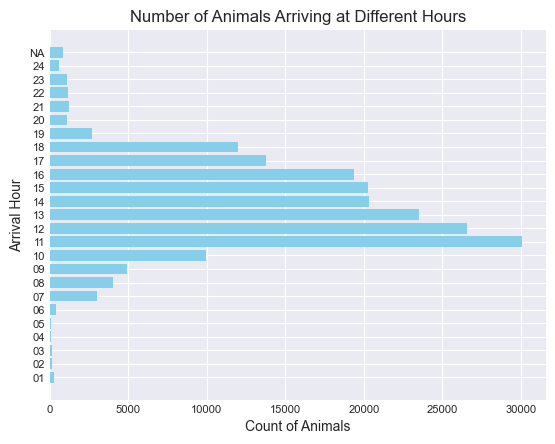

The hour with the most arrivals is: 11 with 30081 arrivals.
The hour with the least arrivals is: 05 with 69 arrivals.
The average number of arrivals per hour is: 7904.04.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class AnimalShelterAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = self.load_data()

    def load_data(self):
        try:
            data = pd.read_csv(self.file_path, low_memory=False)

            def convert_hour(x):
                try:
                    return str(int(x)).zfill(2)
                except ValueError: 
                    return 'NA'  
            data['in_hour'] = data['in_hour'].apply(convert_hour)
            return data
        except FileNotFoundError:
            print(f"The file at path {self.file_path} was not found.")
            return None


    def sort_data(self, values, labels):
        sorted_indices = np.argsort(labels)
        return values[sorted_indices], labels[sorted_indices]

    def plot_arrival_hours(self, sort_by='na'):
        arrival_hours = self.data['in_hour'].values
        unique_hours, counts = np.unique(arrival_hours, return_counts=True)
        
        if sort_by == 'label':
            counts, unique_hours = self.sort_data(counts, unique_hours)
        
        plt.barh(unique_hours, counts, color='skyblue')
        plt.xlabel('Count of Animals', fontsize=10)
        plt.ylabel('Arrival Hour', fontsize=10)
        plt.title('Number of Animals Arriving at Different Hours', fontsize=12)
        plt.tick_params(axis='both', which='major', labelsize=8)  
        plt.show()

    def display_arrival_hour_stats(self):
        arrival_hours = self.data['in_hour'].values
        unique_hours, counts = np.unique(arrival_hours, return_counts=True)
        
        max_index = np.argmax(counts)
        min_index = np.argmin(counts)
        
        print(f"The hour with the most arrivals is: {unique_hours[max_index]} with {counts[max_index]} arrivals.")
        print(f"The hour with the least arrivals is: {unique_hours[min_index]} with {counts[min_index]} arrivals.")
        print(f"The average number of arrivals per hour is: {np.mean(counts):.2f}.")

file_path = 'data/austin_pet.csv'  
analysis = AnimalShelterAnalysis(file_path)
analysis.plot_arrival_hours(sort_by='label')
analysis.display_arrival_hour_stats()


**Interpretation**

The results reveals that the busiest time for the animal arrivals at the shelter is 11 AM, with 30,081 arrivals, while the quietest time is 5 AM, with only 69 arrivals. On average, 7,904 animals per hour. This insight can help the shelter staff anticipate high-traffic times and try to optimize their workflow accordingly. With most animals arriving during mid-morning, staff should be prepared to handle a surge in intakes around this time, to make sure they have enough staff, resources, and facilities ready to accomodate the increased demand. And adding on to this, the early morning hours such as 5 AM would be a better time for other shelter activities such as maintenance since there are not as many arrivals. 

### 2c. What are the most common conditions in which animals enter the shelter?
    
**Optional:** It might be helpful to express your counts as a percentage (i.e. each condition accounts for X percent of animals that enter). If you do this, use the [np.round](https://numpy.org/doc/stable/reference/generated/numpy.round.html) function to round the percentages to 2 decimal places (otherwise the plot will look cluttered!). -->

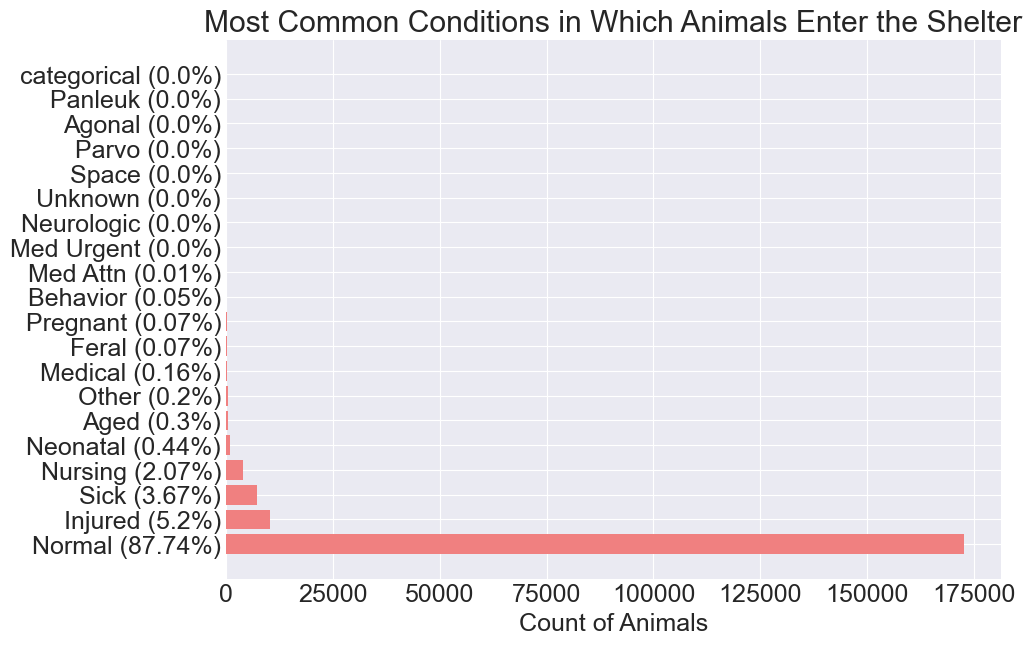

The most common condition is: Normal with 172657 animals.
The least common condition is: Panleuk with 1 animals.
The average number of animals per condition is: 9839.25.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class AnimalShelterAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = self.load_data()

    def load_data(self):
        try:
            data = pd.read_csv(self.file_path, low_memory=False)

            def convert_hour(x):
                try:
                    return str(int(x)).zfill(2)
                except ValueError: 
                    return 'NA'  

            data['in_hour'] = data['in_hour'].apply(convert_hour)
            return data
        except FileNotFoundError:
            print(f"The file at path {self.file_path} was not found.")
            return None


    def sort_data(self, values, labels):
        sorted_indices = np.argsort(labels)
        return values[sorted_indices], labels[sorted_indices]

    def plot_condition_distribution(self):
        conditions = self.data['in_condition'].dropna().values
        unique_conditions, counts = np.unique(conditions, return_counts=True)
        
        sorted_indices = np.argsort(counts)[::-1]
        unique_conditions = unique_conditions[sorted_indices]
        counts = counts[sorted_indices]
        
        percentages = np.round((counts / counts.sum()) * 100, 2)
        labels = [f"{condition} ({percentage}%)" for condition, percentage in zip(unique_conditions, percentages)]
        
        plt.figure(figsize=(10, 7))
        plt.barh(labels, counts, color='lightcoral')
        plt.xlabel('Count of Animals')
        plt.title('Most Common Conditions in Which Animals Enter the Shelter')
        plt.show()

    def display_condition_stats(self):
        conditions = self.data['in_condition'].dropna().values
        unique_conditions, counts = np.unique(conditions, return_counts=True)
        
        max_index = np.argmax(counts)
        min_index = np.argmin(counts)
        
        print(f"The most common condition is: {unique_conditions[max_index]} with {counts[max_index]} animals.")
        print(f"The least common condition is: {unique_conditions[min_index]} with {counts[min_index]} animals.")
        print(f"The average number of animals per condition is: {np.mean(counts):.2f}.")

file_path = 'data/austin_pet.csv'  
analysis = AnimalShelterAnalysis(file_path)
analysis.plot_condition_distribution()
analysis.display_condition_stats()


**Interpretation**

The results shows us that the majority of animals enter the shelter in "Normal" condition, with 172,657 animals, while the least common condition is "Panleuk," with just one animal. On average, there are about 9,839 animals arriving per condition category. This insight tells us that most animals are arriving in relatively healthy / stable conditions, which may reduce the immediate need for intensive medical care. However, the existence of rare conditions like "Panleuk" signals that the shelter should still be prepared to handle a wide range of medical issues, even if they are infrequent. 


### 2d. What are the top reasons that animals enter the shelter when they arrive in Normal condition?
    
**Optional:** It might be helpful to express your counts as a percentage. If you do this, use the [np.round](https://numpy.org/doc/stable/reference/generated/numpy.round.html) function to round the percentages to 2 decimal places (otherwise the plot will look cluttered!). -->

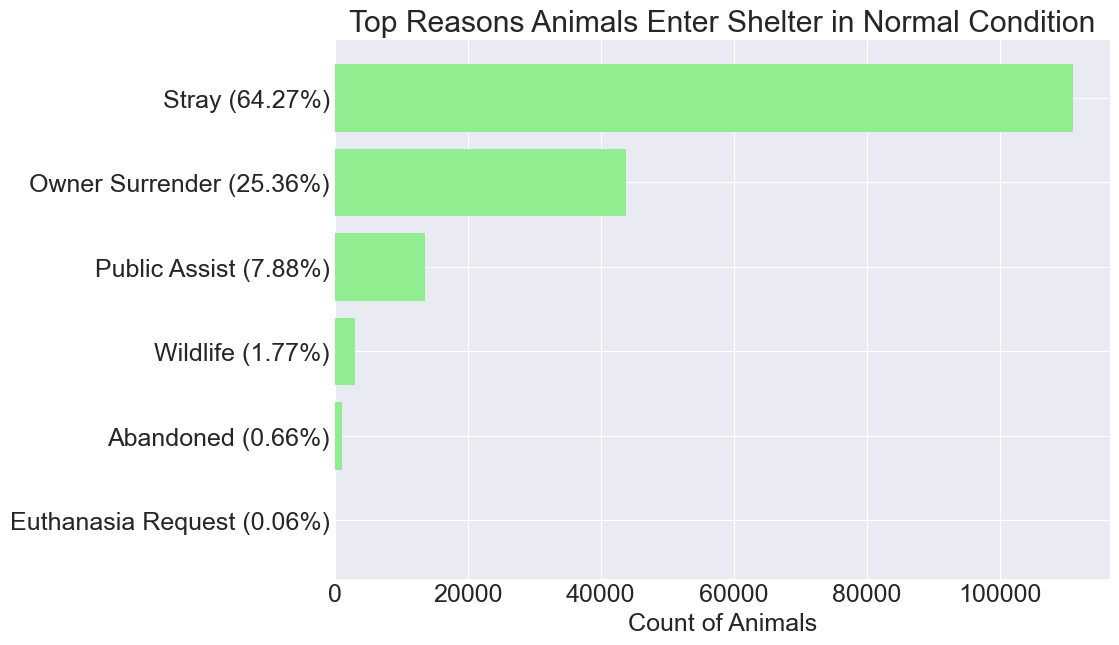

Top Reasons Animals Enter Shelter in Normal Condition:
Stray: 110971 animals (64.27%)
Owner Surrender: 43790 animals (25.36%)
Public Assist: 13599 animals (7.88%)
Wildlife: 3064 animals (1.77%)
Abandoned: 1132 animals (0.66%)
Euthanasia Request: 101 animals (0.06%)


In [25]:
class AnimalShelterAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = self.load_data()

    def load_data(self):
        try:
            dtype_dict = {
                'in_hour': str,
                'in_condition': str,
                'in_reason': str,
            }
            data = pd.read_csv(self.file_path, dtype=dtype_dict, low_memory=False)
            data['in_hour'] = data['in_hour'].apply(lambda x: str(x).zfill(2))
            return data
        except FileNotFoundError:
            print(f"The file at path {self.file_path} was not found.")
            return None

    def sort_data(self, values, labels):
        sorted_indices = np.argsort(labels)
        return values[sorted_indices], labels[sorted_indices]

    def plot_reasons_for_normal_condition(self):
        normal_condition_data = self.data[self.data['in_condition'] == 'Normal']
        reasons = normal_condition_data['in_reason'].dropna().values
        unique_reasons, counts = np.unique(reasons, return_counts=True)
        sorted_indices = np.argsort(counts)[::-1]

        unique_reasons = unique_reasons[sorted_indices]
        counts = counts[sorted_indices]
        percentages = np.round((counts / counts.sum()) * 100, 2)
        labels = [f"{reason} ({percentage}%)" for reason, percentage in zip(unique_reasons, percentages)][:10]

        plt.figure(figsize=(10, 7))
        plt.barh(labels, counts[:10], color='lightgreen')
        plt.xlabel('Count of Animals')
        plt.title('Top Reasons Animals Enter Shelter in Normal Condition')
        plt.gca().invert_yaxis()  
        plt.show()

        print("Top Reasons Animals Enter Shelter in Normal Condition:")
        for reason, count, percentage in zip(unique_reasons[:10], counts[:10], percentages[:10]):
            print(f"{reason}: {count} animals ({percentage}%)")


file_path = 'data/austin_pet.csv'  
analysis = AnimalShelterAnalysis(file_path)
analysis.plot_reasons_for_normal_condition()


**Interpretation**

The majority of animals entering the shelter in "Normal" condition are strays, accounting for 64.27% of the total, followed by owner surrenders at 25.36%. Public assistance cases, wildlife, and abandonment make up smaller proportions, with euthanasia requests representing an extremely rare percentage (0.06%). This suggests that the shelter's primary function is managing stray animals, while owner surrenders are also significant. Understanding this can help the shelter focus its resources, such as community education on stray prevention and support for owners considering surrendering their pets.

## Task 3: Exploratory data analysis of the Austin Pet dataset focusing on the factors that are associated with animal adoption

Continue with the same procedure as in Task 2 (i.e. selecting variable(s), analysis technique(s), make one plot, interpret), but this time focusing on exploring the factors associated with the animal adoption outcome.
    
**Reminder:** Start by resetting the dataset even if you are not filtering the dataset to avoid accidental effects.

 ### 3a. How many animals end up with each outcome when they leave the shelter?


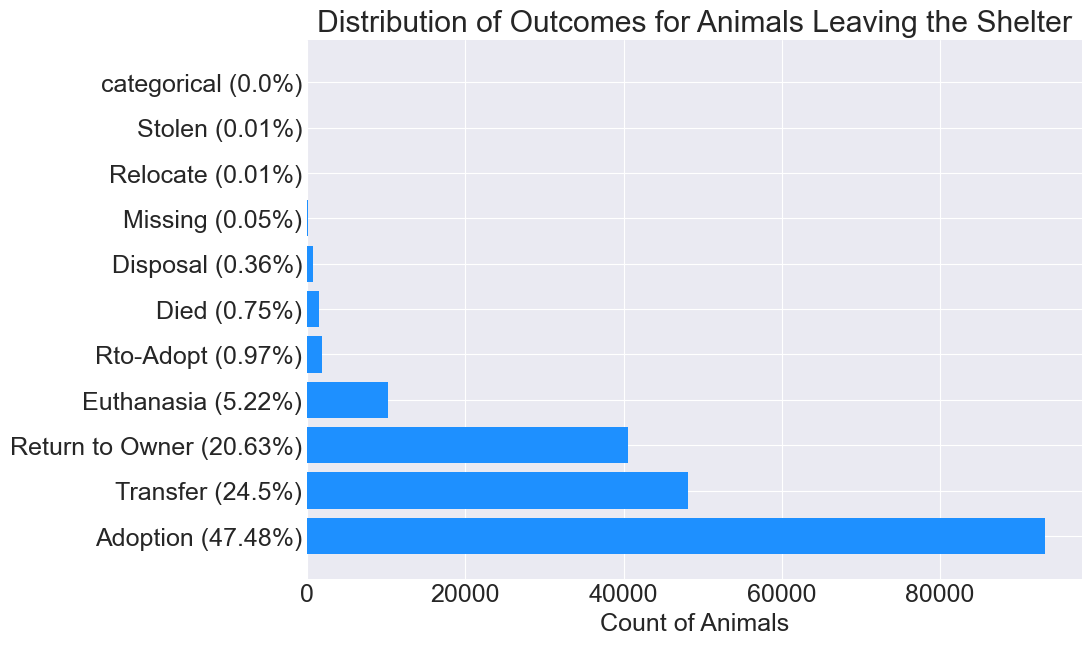

Total number of animals: 196421
Outcome distribution:
Adoption: Count - 93263, Percentage - 47.48%
Transfer: Count - 48132, Percentage - 24.5%
Return to Owner: Count - 40530, Percentage - 20.63%
Euthanasia: Count - 10256, Percentage - 5.22%
Rto-Adopt: Count - 1902, Percentage - 0.97%
Died: Count - 1482, Percentage - 0.75%
Disposal: Count - 711, Percentage - 0.36%
Missing: Count - 105, Percentage - 0.05%
Relocate: Count - 27, Percentage - 0.01%
Stolen: Count - 12, Percentage - 0.01%
categorical: Count - 1, Percentage - 0.0%


In [26]:
class AnimalShelterAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = self.load_data()

    def load_data(self):
        try:
            dtype_dict = {
                'in_hour': str,
                'outcome': str,
                'animal_type': str,
                
            }
           
            data = pd.read_csv(self.file_path, dtype=dtype_dict, low_memory=False)
            return data
        except FileNotFoundError:
            print(f"The file at path {self.file_path} was not found.")
            return None


    def sort_data(self, values, labels):
        sorted_indices = np.argsort(labels)
        return values[sorted_indices], labels[sorted_indices]

    def plot_arrival_hours(self, sort_by='na'):
        arrival_hours = self.data['in_hour'].values
        unique_hours, counts = np.unique(arrival_hours, return_counts=True)
        if sort_by == 'label':
            counts, unique_hours = self.sort_data(counts, unique_hours)
        plt.barh(unique_hours, counts, color='skyblue')
        plt.xlabel('Count of Animals')
        plt.ylabel('Arrival Hour')
        plt.title('Number of Animals Arriving at Different Hours')
        plt.show()

    def plot_condition_distribution(self):
        conditions = self.data['in_condition'].dropna().values  
        unique_conditions, counts = np.unique(conditions, return_counts=True)
        plt.barh(unique_conditions, counts, color='lightcoral')
        plt.xlabel('Count of Animals')
        plt.ylabel('Condition on Arrival')
        plt.title('Distribution of Animal Conditions on Arrival')
        plt.show()

    def plot_reasons_for_normal_condition(self):
        normal_condition_data = self.data[self.data['in_condition'] == 'Normal']  
        reasons = normal_condition_data['in_reason'].dropna().values 
        unique_reasons, counts = np.unique(reasons, return_counts=True)
        plt.barh(unique_reasons, counts, color='lightgreen')
        plt.xlabel('Count of Animals')
        plt.ylabel('Reason for Arrival')
        plt.title('Reasons for Animal Arrival with Normal Condition')
        plt.show()

    def plot_outcome_distribution(self):
        outcomes = self.data['outcome'].dropna().values  
        unique_outcomes, counts = np.unique(outcomes, return_counts=True)
        sorted_indices = np.argsort(counts)[::-1]
        unique_outcomes = unique_outcomes[sorted_indices]
        counts = counts[sorted_indices]
        percentages = np.round((counts / counts.sum()) * 100, 2)
        labels = [f"{outcome} ({percentage}%)" for outcome, percentage in zip(unique_outcomes, percentages)]
        plt.figure(figsize=(10, 7))
        plt.barh(labels, counts, color='dodgerblue')
        plt.xlabel('Count of Animals')
        plt.title('Distribution of Outcomes for Animals Leaving the Shelter')
        plt.show()

        total_animals = counts.sum()
        print(f"Total number of animals: {total_animals}")
        print("Outcome distribution:")
        for outcome, count, percentage in zip(unique_outcomes, counts, percentages):
            print(f"{outcome}: Count - {count}, Percentage - {percentage}%")



file_path = 'data/austin_pet.csv' 
analysis = AnimalShelterAnalysis(file_path)
analysis.plot_outcome_distribution()


**Interpretation**

The majority of animals leaving the shelter are adopted (47.48%), which is a positive outcome, showing that nearly half of the shelter’s animals find new homes. Transfers to other organizations account for 24.5%, and 20.63% of animals are returned to their original owners. Euthanasia represents a small but notable portion (5.22%), highlighting the need for continued efforts to reduce this outcome. Other outcomes, such as RTO-Adopt, died, and missing, account for much smaller percentages. This distribution suggests the shelter is primarily focused on finding homes or returning animals to their owners but still faces challenges with euthanasia and other non-positive outcomes.

### 3b. How many animals of each type have been adopted?


Number of Birds adopted: 258
Number of Cats adopted: 32779
Number of Dogs adopted: 59344
Number of Livestocks adopted: 12
Number of Others adopted: 870
Total number of adoptions: 93263
Most adopted animal type: Dog (59344 adoptions)
Least adopted animal type: Livestock (12 adoptions)
Average number of adoptions per animal type: 18652.60


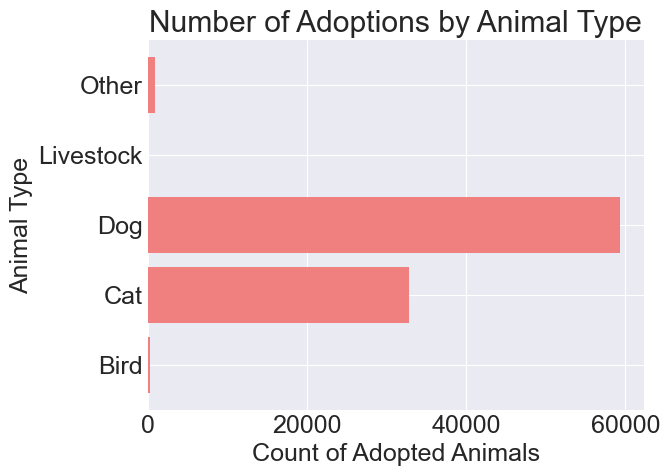

In [27]:
class AnimalShelterAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = self.load_data()

    def load_data(self):
        try:
            dtype_dict = {
                'in_hour': str,
                'outcome': str,
                'animal_type': str,
            }

            data = pd.read_csv(self.file_path, dtype=dtype_dict, low_memory=False)
            return data
        except FileNotFoundError:
            print(f"The file at path {self.file_path} was not found.")
            return None


    def plot_adoptions_by_animal_type(self):
        adopted_data = self.data[self.data['outcome'].str.lower() == 'adoption']
        animal_types = adopted_data['animal_type'].dropna().values
        unique_animal_types, counts = np.unique(animal_types, return_counts=True)
        
        for animal, count in zip(unique_animal_types, counts):
            print(f"Number of {animal}s adopted: {count}")
        print(f"Total number of adoptions: {sum(counts)}")
        print(f"Most adopted animal type: {unique_animal_types[np.argmax(counts)]} ({max(counts)} adoptions)")
        print(f"Least adopted animal type: {unique_animal_types[np.argmin(counts)]} ({min(counts)} adoptions)")
        print(f"Average number of adoptions per animal type: {np.mean(counts):.2f}")
        
        plt.barh(unique_animal_types, counts, color='lightcoral')
        plt.xlabel('Count of Adopted Animals')
        plt.ylabel('Animal Type')
        plt.title('Number of Adoptions by Animal Type')
        plt.show()

file_path = 'data/austin_pet.csv'  
analysis = AnimalShelterAnalysis(file_path)
analysis.plot_adoptions_by_animal_type()


**Interpretation**

The results shows us that dogs are the most adopted animal type, with 59,344 adoptions, making up the majority of adoptions at the shelter. Cats follow with 32,779 adoptions, while birds and other small animals are adopted far less often. Livestock has the least number of adoptions, with only 12. This distribution suggests that dogs and cats are significantly more popular for adoption, while other types of animals, including birds, livestock, and others, see much lower adoption rates. It tells us that there is a need for targeted adoption strategies for less common animals to improve their chances of finding homes.

## Extensions
### a. AI Policy
The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **generative AI (e.g. ChatGPT, Copilot, etc.) is strongly discouraged.** If you do use it, you should use it either at the micro scale (e.g. to better understand syntax of a particular command) or at the outline level (e.g. to get a basic idea).

### b. Guidelines
To receive credit for any extension, you must:
1. **You must describe what you did and what you found in detail**.
2. Include (*labeled!*) plots and/or numbers to present your results.
3. Write up your extensions below or in a separate notebook.
4. Give kudos to all sources, including anyone that you consulted.
    
### c. Suggestions
    
**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**\n",
    
The ideas below are **suggested** extensions â€” feel free to go in another direction related to this project that is not listed!

### 1. Use exploratory data analysis to gain insight about other questions that you formulate about the Austin Pet dataset\n",
    
Use plots to support your investigation and observations.

/var/folders/hm/mgb2wh8d6rs_873kpgf4d14r0000gn/T/ipykernel_757/428428252.py:11: DtypeWarning: Columns (0,7,9,10,14,17,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.file_path, dtype={'in_month': str, 'animal_type': str, 'outcome': str})


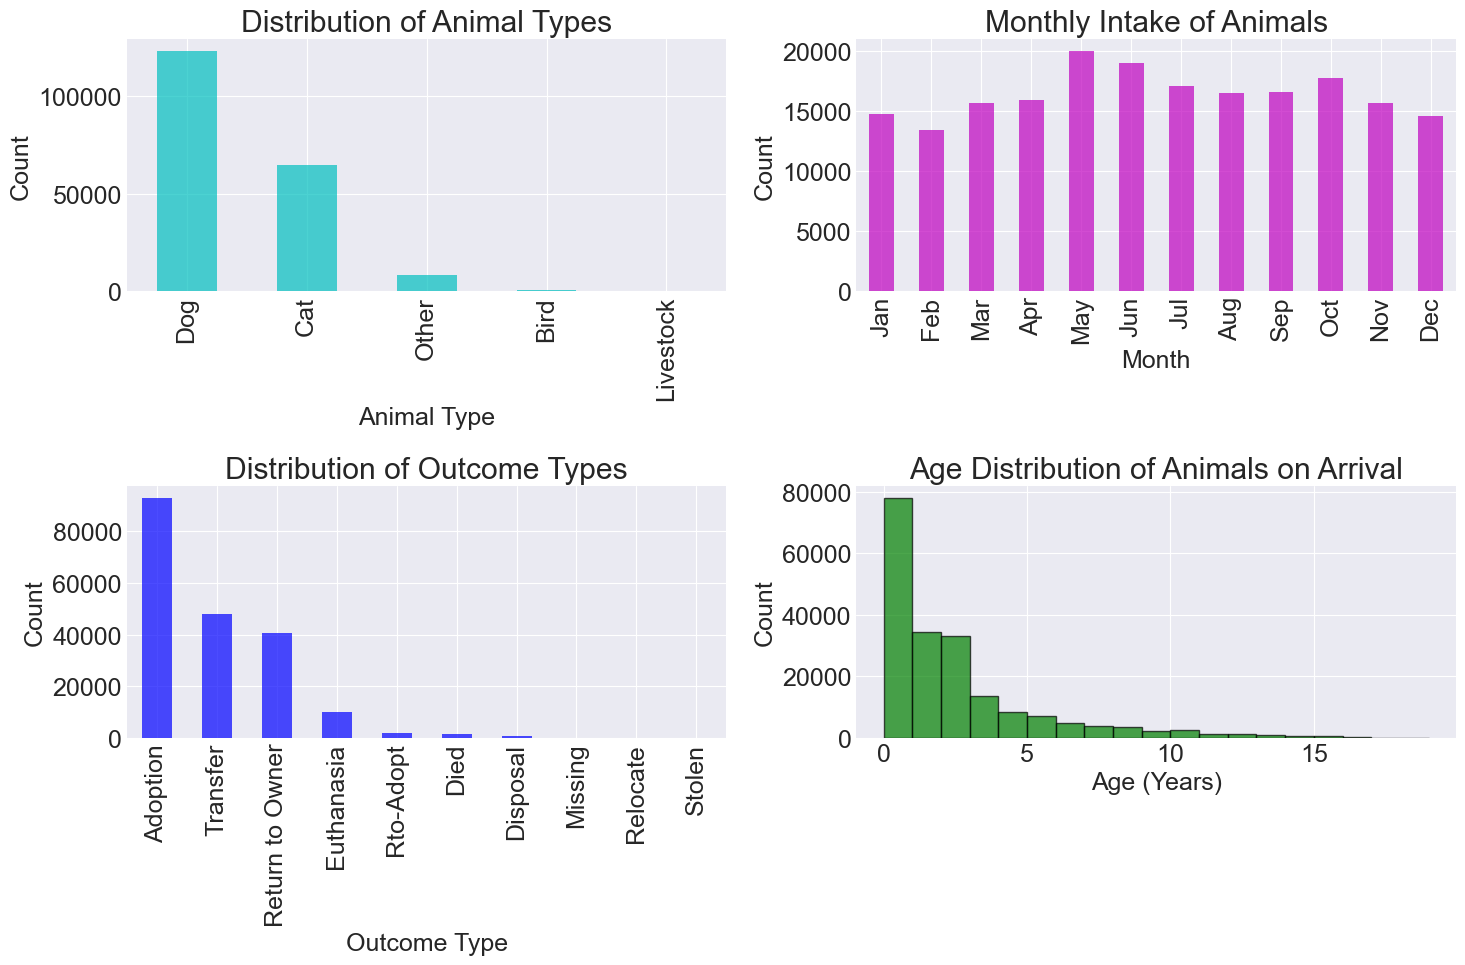

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

class AustinPetAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = self.load_data()

    def load_data(self):
        try:
            df = pd.read_csv(self.file_path, dtype={'in_month': str, 'animal_type': str, 'outcome': str})
            df['in_age_years'] = pd.to_numeric(df['in_age_years'], errors='coerce')
            df = df.dropna(subset=['in_age_years'])
            return df
        except FileNotFoundError:
            print(f"The file at path {self.file_path} was not found.")
            return None


    def plot_all(self):
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        #plot 1 
        animal_counts = self.df['animal_type'].value_counts()
        animal_counts.plot(kind='bar', color='c', alpha=0.7, ax=axes[0, 0])
        axes[0, 0].set_title('Distribution of Animal Types')
        axes[0, 0].set_xlabel('Animal Type')
        axes[0, 0].set_ylabel('Count')

        #plot 2 
        self.df['in_month'] = pd.to_numeric(self.df['in_month'], errors='coerce')
        monthly_intakes = self.df['in_month'].value_counts().sort_index()
        monthly_intakes.plot(kind='bar', color='m', alpha=0.7, ax=axes[0, 1])
        axes[0, 1].set_title('Monthly Intake of Animals')
        axes[0, 1].set_xlabel('Month')
        axes[0, 1].set_ylabel('Count')
        axes[0, 1].set_xticks(range(12))
        axes[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

        #plot 3
        outcome_counts = self.df['outcome'].value_counts()
        outcome_counts.plot(kind='bar', color='b', alpha=0.7, ax=axes[1, 0])
        axes[1, 0].set_title('Distribution of Outcome Types')
        axes[1, 0].set_xlabel('Outcome Type')
        axes[1, 0].set_ylabel('Count')

        #plot 4
        axes[1, 1].hist(self.df['in_age_years'].dropna(), bins=range(0, 20), color='g', alpha=0.7, edgecolor='black')
        axes[1, 1].set_title('Age Distribution of Animals on Arrival')
        axes[1, 1].set_xlabel('Age (Years)')
        axes[1, 1].set_ylabel('Count')

        plt.tight_layout()
        plt.show()

file_path = 'data/austin_pet.csv'  
analysis = AustinPetAnalysis(file_path)
analysis.plot_all()

In [1]:
import pandas as pd
import numpy as np

class AustinPetAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = self.load_data()

    def load_data(self):
        try:
            df = pd.read_csv(self.file_path, low_memory=False)
            df['in_age_years'] = pd.to_numeric(df['in_age_years'], errors='coerce')
            df = df.dropna(subset=['in_age_years'])
            return df
        except FileNotFoundError:
            print(f"The file at path {self.file_path} was not found.")
            return None

    def print_stats(self):
        if self.df is not None:
            self.print_stat(self.df['animal_type'].value_counts(), 'Animal Type')
            self.print_stat(self.df['in_month'].value_counts().sort_index(), 'Month')
            self.print_stat(self.df['outcome'].value_counts(), 'Outcome Type')
            self.print_age_distribution()

    def print_stat(self, counts, name):
        print(f"\nTotal count for {name}: {counts.sum()}")
        print(f"{name} Distribution:")
        for idx, count in counts.items():  
            percentage = (count / counts.sum()) * 100
            print(f"{idx}: Count - {count}, Percentage - {percentage:.2f}%")


    def print_age_distribution(self):
        age_counts, bin_edges = np.histogram(self.df['in_age_years'].dropna(), bins=range(0, 21))
        print(f"\nTotal count of age data: {age_counts.sum()}")
        print("Age Distribution on Arrival:")
        for i in range(len(age_counts)):
            percentage = (age_counts[i] / age_counts.sum()) * 100
            print(f"Age {bin_edges[i]}-{bin_edges[i+1]}: Count - {age_counts[i]}, Percentage - {percentage:.2f}%")

file_path = 'data/austin_pet.csv'  
analysis = AustinPetAnalysis(file_path)
analysis.print_stats()



Total count for Animal Type: 196783
Animal Type Distribution:
Dog: Count - 123143, Percentage - 62.58%
Cat: Count - 64676, Percentage - 32.87%
Other: Count - 8177, Percentage - 4.16%
Bird: Count - 761, Percentage - 0.39%
Livestock: Count - 26, Percentage - 0.01%

Total count for Month: 196783
Month Distribution:
01: Count - 14712, Percentage - 7.48%
02: Count - 13379, Percentage - 6.80%
03: Count - 15663, Percentage - 7.96%
04: Count - 15882, Percentage - 8.07%
05: Count - 19968, Percentage - 10.15%
06: Count - 19017, Percentage - 9.66%
07: Count - 17104, Percentage - 8.69%
08: Count - 16476, Percentage - 8.37%
09: Count - 16546, Percentage - 8.41%
10: Count - 17737, Percentage - 9.01%
11: Count - 15704, Percentage - 7.98%
12: Count - 14595, Percentage - 7.42%

Total count for Outcome Type: 195603
Outcome Type Distribution:
Adoption: Count - 92724, Percentage - 47.40%
Transfer: Count - 47928, Percentage - 24.50%
Return to Owner: Count - 40499, Percentage - 20.70%
Euthanasia: Count - 1

**Analysis from the graphical distributions**

After analyzing the data that was provided, we found that there are 196,783 animals in all, with dogs making up the majority (62.58%) and cats making up the third (32.87%), making up a decent size of the population. Other animals make up a comparably small portion of the data; Other (4.16%), Birds (0.39%), and Livestock (0.01%) 

Examining the animals' monthly consumption, we saw variations from month to month. With 10.15%, May had the largest consumption, while February had the lowest intake, 6.80%. The monthly breakdown of animal admission offers info about the dynamics of animal shelters throughout the year. 

The age dynamics of the animal population in the shelter can be understood by seeing the age distribution upon arrival. There are a lot of young animals present, as seen by the fact that most of the animals are between the ages of 0 and 3. The greatest number of animals: 39.57% of the total come from the 0–1 age group. As the age range widens, the number of animals gradually declines, with the age range of 16 to 20 years having the lowest number of animals.

***More of an Analysis about my Extension***


In the first section of my extension, we provide a class called `AustinPetAnalysis', which we created specifically for analyzing a dataset on pets in Austin. This class is carefully designed; it has four methods, one for each type of data analysis task, and an initializer.

The `AustinPetAnalysis` class needs a file path as input when it is first ran. The file path is passed as an input to the `load_data` function, which is called by the initializer, or `__init__' method. The information returned by this method is subsequently assigned to {self.df}. The class's functioning is reliant on the `load_data` method. It makes an attempt to fill a pandas DataFrame with a CSV file that is located at the given file path. We specifically set the data types for the "in_month," "animal_type," and "outcome" columns during this procedure. The 'in_age_years' column is also converted to a numeric data type, with any non-convertible or incorrect values being set to NaN. Next, we eliminate rows with 'in_age_years' values that are NaN. Instead of removing these rows, we can choose to substitute the necessary placeholders or averages for these NaN values, depending on the goal of our research. If the file at the given path cannot be located, the method either returns the prepared DataFrame or tells the user.

The `plot_animal_types` method is designed to illustrate the distribution of different animal types in the dataset after the data loading procedure. The most and least common animal types in the dataset can be easily identified by counting the instances of each distinct animal type and creating a bar chart of this distribution. The `plot_monthly_intakes' technique is to offer info about animals' monthly intake. We can observe patterns in animal intake throughout the year by converting the 'in_month' values to numeric values and plotting the number of animals taken into the shelter each month. 

The `plot_outcome_types' technique provides information about the various outcomes that the animals encounter. A visual summary is given about the end states of the animals in the dataset by creating a bar chart that shows the distribution of distinct outcome categories. The {plot_age_distribution_on_arrival} method uses a histogram to illustrate the age distribution of animals as they enter the shelter, giving a clear picture of the age groups that are most frequently represented there.

### 6. Box-and-Whisker plot
    Create a function that generates a box-and-whisker plot using matplotlib and make use of it in an analysis of the Austin Pet dataset.

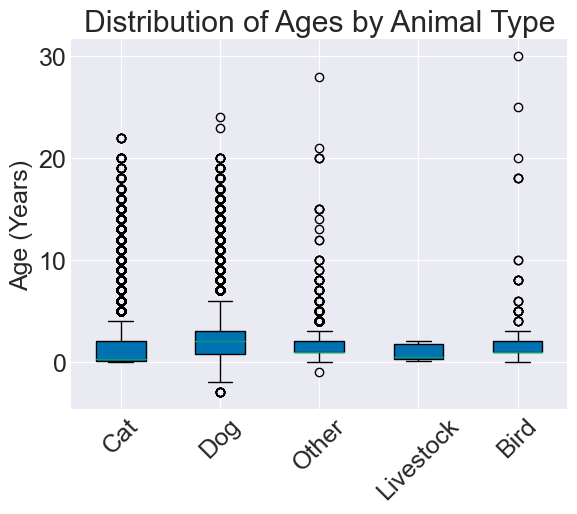

In [36]:
import matplotlib.pyplot as plt
import csv

def box_and_whisker(data, category_col, numeric_col, title, ylabel):
    grouped_data = {}
    for row in data:
        key = row[category_col]
        value = float(row[numeric_col]) if row[numeric_col] and row[numeric_col] != 'numeric' else None
        if key in grouped_data:
            if value is not None:
                grouped_data[key].append(value)
        else:
            grouped_data[key] = [value] if value is not None else []

    labels = []
    data_to_plot = []
    for key, values in grouped_data.items():
        labels.append(key)
        data_to_plot.append(values)

    plt.boxplot(data_to_plot, vert=True, patch_artist=True, labels=labels)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  
    plt.show()


with open('data/austin_pet.csv', mode='r') as file:
    csvFile = csv.DictReader(file)
    next(csvFile)  # 
    data = list(csvFile)

box_and_whisker(data, 'animal_type', 'in_age_years', 'Distribution of Ages by Animal Type', 'Age (Years)')


In order to do an exploratory data analysis, we generated instructive box-and-whisker plots using this code. The first row, which contains the data type information, has been skipped. This code's goal is to look into how different animal species in the Austin Pet dataset distribute their ages. To ensure that we treat missing data as efficiently as possible, we categorize the data by 'animal_type' and gather the relevant 'in_age_years' values. We can quickly identify the major spread, and possible outliers within each animal type group by using box-and-whisker plots to visualize this data. For example, look at the animals. The age distribution is minimal.

### 7. Count samples according to levels from two categorical levels\n",

For example, how many Dogs, Cats, and Birds left the shelter every year since 2013? This kind of question involves counting samples that have different combinations of levels from two categorical variables (`animal_type` and `out_year` in this case).
   
Write `cat_count2` to implement support for this type of analysis.
   
Create a new plotting function to visualize the results using a side-by-side bar chart. [Here is an example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html).

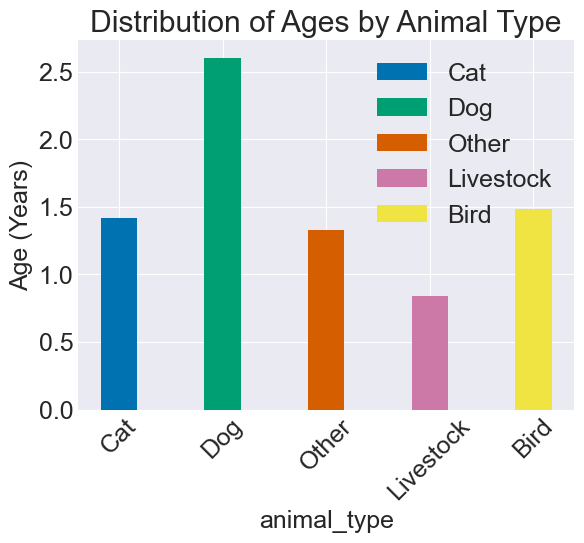

In [37]:
import matplotlib.pyplot as plt
import csv
from statistics import mean


def side_by_side_bar_chart(data, category_col, numeric_col, title, ylabel):
    grouped_data = {}
    for row in data:
        key = row[category_col]
        value = float(row[numeric_col]) if row[numeric_col] and row[numeric_col] != 'numeric' else None
        if key in grouped_data:
            if value is not None:
                grouped_data[key].append(value)
        else:
            grouped_data[key] = [value] if value is not None else []

    labels = list(grouped_data.keys())
    values = [grouped_data[key] for key in labels]

    num_bars = len(labels)
    bar_width = 0.35
    x = range(num_bars)

    fig, ax = plt.subplots()
    for i in range(num_bars):
        ax.bar(x[i], [mean(values[i])], bar_width, label=labels[i])
    
    ax.set_xlabel(category_col)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks([i for i in range(num_bars)])
    ax.set_xticklabels(labels, rotation=45)
    ax.legend()

    plt.show()

with open('data/austin_pet.csv', mode='r') as file:
    csvFile = csv.DictReader(file)
    next(csvFile)  
    data = list(csvFile)

side_by_side_bar_chart(data, 'animal_type', 'in_age_years', 'Distribution of Ages by Animal Type', 'Age (Years)')


The data has been processed, sorted according to animal species, and determined the average age of each animal group in order to create a visualization by creating side-by-side bar charts. After that, we make a bar chart in which every bar represents a certain animal species and its height denotes the average age of the animals in that group. Additionally, we have made sure that the labels on the x-axis indicate the different kinds of animals so that it is easy to compare the average ages of the various animal categories. The graphic shows that dogs are primarily found in populations above 2.5 years old and that they also resemble birds. 


"kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.8.5"
  }
 "nbformat": 4,
 "nbformat_minor": 4